In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random

In [2]:
keyword_path = 'dataset/keywords.csv'
rating_path = 'dataset/ratings_small.csv'  # ratings_small is big enough
movie_path = 'dataset/movies_metadata.csv'

keywords = pd.read_csv(keyword_path)
ratings = pd.read_csv(rating_path)
movies = pd.read_csv(movie_path)

movies.head()

C:\Users\8613902476582\AppData\Local\Temp\ipykernel_70244\888656525.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv(movie_path)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
movies.columns.tolist()

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [4]:
desired_columns = ['id', 'title', 'genres']
movies_refined = movies.loc[:, desired_columns]
movies_refined.head()

,id,title,genres
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [5]:
movies_refined['genres'] = movies_refined['genres'].str.replace("'", '"')
movies_refined.head()

,id,title,genres
0,862,Toy Story,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""..."
1,8844,Jumanji,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,15602,Grumpier Old Men,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ..."
3,31357,Waiting to Exhale,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4,11862,Father of the Bride Part II,"[{""id"": 35, ""name"": ""Comedy""}]"


In [6]:
def EDA_genres(genres):
    genre_list = json.loads(genres)
    
    all_genres = ','.join(genre['name'] for genre in genre_list)
        
    return all_genres

In [7]:
movies_refined['AllGenres'] = movies_refined['genres'].apply(EDA_genres)

movies_refined.drop(['genres', ], axis=1, inplace=True)
movies_refined.head()

,id,title,AllGenres
0,862,Toy Story,"Animation,Comedy,Family"
1,8844,Jumanji,"Adventure,Fantasy,Family"
2,15602,Grumpier Old Men,"Romance,Comedy"
3,31357,Waiting to Exhale,"Comedy,Drama,Romance"
4,11862,Father of the Bride Part II,Comedy


C:\Users\8613902476582\AppData\Local\Temp\ipykernel_70244\1958377349.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  s = df['AllGenres'].str.split(',').apply(pd.Series, 1).stack()


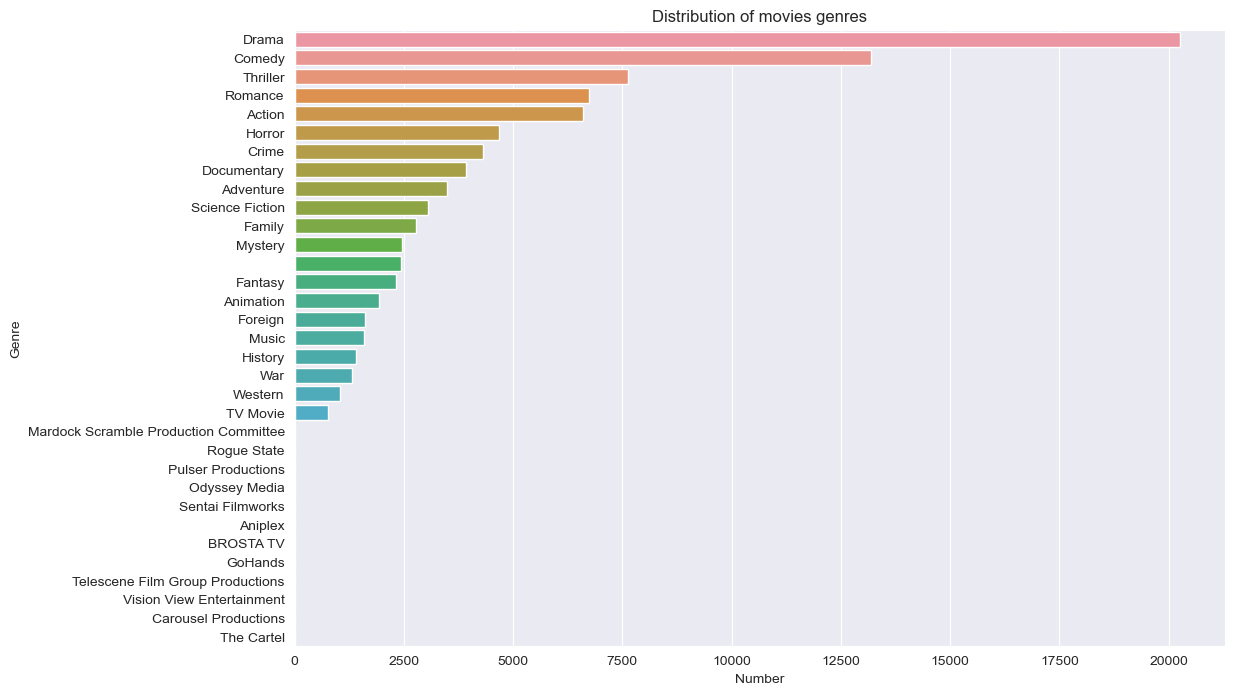

In [8]:
df = movies_refined.copy()

s = df['AllGenres'].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genre'
df_genres = df.drop('AllGenres', axis=1).join(s)

plt.figure(figsize=(12, 8))
genre_count = df_genres['Genre'].value_counts()
sns.barplot(x=genre_count, y=genre_count.index)
plt.title('Distribution of movies genres')
plt.xlabel('Number')
plt.ylabel('Genre')
plt.show()

In [9]:
movies_refined.duplicated(subset=['id', 'title']).sum()

30

In [10]:
print(keywords['id'].dtypes)
print(movies_refined['id'].dtypes)
print(ratings['movieId'].dtypes)

int64
object
int64


In [11]:
keywords['id'] = keywords['id'].astype(str)
movies_refined['id'] = movies_refined['id'].astype(str)
ratings['movieId'] = ratings['movieId'].astype(str)

In [12]:
dup = movies_refined.duplicated(subset=['id', 'title'])
dup_movies = movies_refined[dup].sort_values(by=['title', ])
dup_movies

,id,title,AllGenres
15074,22649,A Farewell to Arms,"Drama,Romance,War"
21116,84198,A Place at the Table,Documentary
20843,77221,Black Gold,"Adventure,Drama"
13375,141971,Blackout,"Thriller,Mystery"
16764,141971,Blackout,"Thriller,Mystery"
23044,25541,Brotherhood,Drama
12066,14788,Bubble,"Drama,Crime,Mystery"
23534,110428,Camille Claudel 1915,Drama
40040,298721,Cemetery of Splendour,"Drama,Fantasy"
33743,15028,Clockstoppers,"Adventure,Family,Science Fiction,Thriller"


### Very lucky:

In [13]:
for id_ in dup_movies['id']:
    if id_ in ratings['movieId']:
        print(f'ID: {id_} is in ratings.csv', end=', ')
    if id_ in keywords['id']:
        print(f'ID: {id_} is in keywords.csv', end=', ')

In [14]:
movies_refined = movies_refined.drop_duplicates(subset=['id', 'title'])
movies_refined.duplicated(subset=['id', 'title']).sum()

0

In [15]:
movies_refined.isnull().sum().sort_values()

id           0
AllGenres    0
title        6
dtype: int64

In [16]:
movies_refined = movies_refined.dropna(subset=['title', ])
movies_refined.isnull().sum().sort_values()

id           0
title        0
AllGenres    0
dtype: int64

## Now process keywords:

In [17]:
keywords_movie_id = keywords['id'].unique().tolist()
len(keywords_movie_id)

45432

In [18]:
movies_with_keywords = movies_refined[movies_refined['id'].isin(keywords_movie_id)]
print(movies_with_keywords.shape[0])

45429


In [19]:
# check the datatype of the "keywords" column
print(keywords.iloc[1]['keywords'])

[{'id': 10090, 'name': 'board game'}, {'id': 10941, 'name': 'disappearance'}, {'id': 15101, 'name': "based on children's book"}, {'id': 33467, 'name': 'new home'}, {'id': 158086, 'name': 'recluse'}, {'id': 158091, 'name': 'giant insect'}]


In [20]:
def EDA_keywords(keywords):
    try:
        keywords_list = json.loads(keywords)
        
        keywords_num = len(keywords_list)
        if keywords_num > 4:
            keywords_list = random.sample(keywords_list, 4)
            
        all_keywords = ','.join(keyword['name'] for keyword in keywords_list)
        return all_keywords
    
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return ''

In [21]:
keywords['keywords'] = keywords['keywords'].str.replace("'", '"')

keywords['AllKeywords'] = keywords['keywords'].apply(EDA_keywords)
keywords.head()

Error parsing JSON: Expecting ',' delimiter: line 1 column 120 (char 119)
Error parsing JSON: Expecting ',' delimiter: line 1 column 62 (char 61)
Error parsing JSON: Expecting ',' delimiter: line 1 column 265 (char 264)
Error parsing JSON: Expecting ',' delimiter: line 1 column 140 (char 139)
Error parsing JSON: Expecting ',' delimiter: line 1 column 320 (char 319)
Error parsing JSON: Expecting ',' delimiter: line 1 column 220 (char 219)
Error parsing JSON: Invalid \escape: line 1 column 222 (char 221)
Error parsing JSON: Expecting ',' delimiter: line 1 column 182 (char 181)
Error parsing JSON: Expecting ',' delimiter: line 1 column 176 (char 175)
Error parsing JSON: Expecting ',' delimiter: line 1 column 173 (char 172)
Error parsing JSON: Expecting ',' delimiter: line 1 column 229 (char 228)
Error parsing JSON: Expecting ',' delimiter: line 1 column 100 (char 99)
Error parsing JSON: Invalid \escape: line 1 column 217 (char 216)
Error parsing JSON: Expecting ',' delimiter: line 1 colum

,id,keywords,AllKeywords
0,862,"[{""id"": 931, ""name"": ""jealousy""}, {""id"": 4290,...","boy next door,toy,friendship,friends"
1,8844,"[{""id"": 10090, ""name"": ""board game""}, {""id"": 1...",
2,15602,"[{""id"": 1495, ""name"": ""fishing""}, {""id"": 12392...","fishing,best friend,duringcreditsstinger,old men"
3,31357,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","interracial relationship,chick flick,single mo..."
4,11862,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 1599, ""n...","aging,confidence,gynecologist,midlife crisis"


In [22]:
print((keywords['AllKeywords'] == '').sum())

15426


In [23]:
movies_with_keywords = pd.merge(movies_with_keywords, keywords, on='id', how='inner')
movies_with_keywords.drop(['keywords', ], axis=1, inplace=True)
movies_with_keywords.head()

,id,title,AllGenres,AllKeywords
0,862,Toy Story,"Animation,Comedy,Family","boy next door,toy,friendship,friends"
1,8844,Jumanji,"Adventure,Fantasy,Family",
2,15602,Grumpier Old Men,"Romance,Comedy","fishing,best friend,duringcreditsstinger,old men"
3,31357,Waiting to Exhale,"Comedy,Drama,Romance","interracial relationship,chick flick,single mo..."
4,11862,Father of the Bride Part II,Comedy,"aging,confidence,gynecologist,midlife crisis"


In [27]:
movies_with_keywords.shape[0]

46415

In [28]:
movies_with_keywords.isnull().sum().sort_values()

id             0
title          0
AllGenres      0
AllKeywords    0
dtype: int64

In [29]:
movies_with_keywords.duplicated(subset=['id', ]).sum()

986

In [30]:
movies_with_keywords = movies_with_keywords.drop_duplicates(subset=['id', ])
movies_with_keywords.duplicated(subset=['id', ]).sum()

0

In [31]:
movies_with_keywords.shape[0]

45429

## Now process ratings

In [32]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  object 
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [33]:
ratings.isnull().sum().sort_values()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [34]:
ratings.duplicated(subset=['userId', 'movieId']).sum()

0

## Now I have all the movies with keywords
### Create some small datasets
#### 1. selected ratings + rated movies = recommendations with history

In [35]:
unique_movie_id_keywords = movies_with_keywords['id'].unique().tolist()
len(unique_movie_id_keywords)

45429

In [36]:
ratings_for_history = ratings[ratings['movieId'].isin(unique_movie_id_keywords)]
ratings_for_history = ratings_for_history.reset_index(drop=True)
print(ratings_for_history.shape[0])
ratings_for_history.head()

44989


,userId,movieId,rating,timestamp
0,1,1371,2.5,1260759135
1,1,1405,1.0,1260759203
2,1,2105,4.0,1260759139
3,1,2193,2.0,1260759198
4,1,2294,2.0,1260759108


#### 2. Create a subset of movies with keywords
#### Also the corresponding ratings

In [37]:
sample_ids = np.random.choice(unique_movie_id_keywords, size=5000, replace=False)
movies_5000 = movies_with_keywords[movies_with_keywords['id'].isin(sample_ids)]
movies_5000 = movies_5000.reset_index(drop=True)
movies_5000.head()

,id,title,AllGenres,AllKeywords
0,9273,Ace Ventura: When Nature Calls,"Crime,Comedy,Adventure","africa,indigenous,human animal relationship,bat"
1,9598,Babe,"Fantasy,Drama,Comedy,Family","sheep,talking animal,pig,german shepherd"
2,8391,When Night Is Falling,"Drama,Romance","professor,lgbt,woman director"
3,40628,Two Bits,"Drama,Family",
4,11859,Fair Game,"Action,Thriller,Romance","on the run,miami,conspiracy,foot chase"


In [38]:
ratings_for_history_small = ratings[ratings['movieId'].isin(sample_ids)]
ratings_for_history_small = ratings_for_history_small.reset_index(drop=True)
print(ratings_for_history_small.shape[0])
ratings_for_history_small.head()

4278


,userId,movieId,rating,timestamp
0,2,186,3.0,835355664
1,2,235,3.0,835355664
2,2,265,5.0,835355697
3,2,272,3.0,835355767
4,2,319,1.0,835355918


### Export those datasets

In [39]:
movies_with_keywords.to_csv('dataset/movies_with_keywords.csv', index=False)
movies_5000.to_csv('dataset/movies_5000.csv', index=False)
ratings_for_history.to_csv('dataset/ratings_for_history.csv', index=False)
ratings_for_history_small.to_csv('dataset/ratings_for_history_small.csv', index=False)